## titanic survival prediction

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

### load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### handling null values

In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.shape

(418, 11)

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train = train.drop('Cabin', axis=1)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [9]:
test = test.drop('Cabin', axis=1)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

### EDA

In [10]:
train1 = train.copy()
test1 = test.copy()

In [11]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
train1 = train1.drop(['PassengerId','Name','Ticket'], axis=1)
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
test1 = test1.drop(['PassengerId','Name','Ticket'], axis=1)
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [14]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

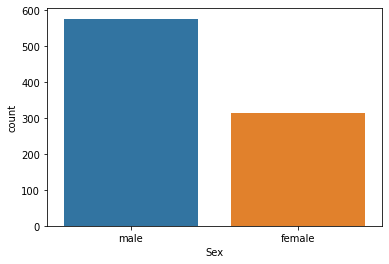

In [15]:
sns.countplot(x=train1.Sex)

In [16]:
train1.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
train1.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
x = train1.Fare.value_counts()

In [19]:
train1.Fare.mean()

32.204207968574636

## Outlier removal

In [20]:
train2 = train1.copy()

In [21]:
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i - mean)/std
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers

#### Age outlier

In [23]:
Age_ol = detect_outliers(train2.Age)
print('len of Age_ol = ',len(Age_ol))
Age_ol

len of Age_ol =  7


[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [24]:
train2.shape

(891, 8)

In [25]:
np.sort(Age_ol)

array([70. , 70. , 70.5, 71. , 71. , 74. , 80. ])

In [26]:
#remove Age outlier
train2 = train2[train2.Age <70]
train2.shape

(884, 8)

#### Fare

In [27]:
Fare_ol = detect_outliers(train2.Fare)
print('len of Fare_ol = ',len(Fare_ol))
Fare_ol

len of Fare_ol =  20


[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [28]:
min(Fare_ol)

211.3375

In [29]:
train2 = train2[train2.Fare<211.3375]
train2.shape

(864, 8)

## Feature engineering

In [31]:
train4 = train3.copy()
test2 = test1.copy()

In [32]:
train4 = pd.get_dummies(train4, columns=['Sex', 'Embarked'])
train4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [33]:
test2 = pd.get_dummies(test2, columns=['Sex', 'Embarked'])
test2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [34]:
#split data
x = train4.drop('Survived', axis=1)
y = train4.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [35]:
train4.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [36]:
train4.SibSp.value_counts()

0    589
1    206
2     26
4     18
3     13
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
train4.Pclass.value_counts()

3    489
1    192
2    183
Name: Pclass, dtype: int64

In [38]:
train4.Parch.value_counts()

0    664
1    112
2     74
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

#### handling imbalance data

In [39]:
train_data = pd.concat([x_train, y_train], axis =1)
train_data.Survived.value_counts()

0    434
1    257
Name: Survived, dtype: int64

In [40]:
survive = train_data[train_data.Survived == 1]
not_survive = train_data[train_data.Survived ==0]

In [41]:
#upsample minority(survive) class
survive_upsample = resample(
    survive,
    replace = True,
    n_samples = len(not_survive),
    random_state = 27
)

In [42]:
upsampled =pd.concat([not_survive, survive_upsample])

In [43]:
upsampled.Survived.value_counts()

1    434
0    434
Name: Survived, dtype: int64

In [44]:
upsampled.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'],
      dtype='object')

In [45]:
y_train = upsampled.Survived
x_train = upsampled.drop('Survived',axis=1)

In [46]:
y_train.shape

(868,)

## Model Building

In [47]:
kfold = StratifiedKFold(n_splits=10)

#### LogisticRegression

In [48]:
logr_model = LogisticRegression()
logr_model.fit(x_train, y_train)
logr_model.score(x_test,y_test)

c:\users\romiyo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092485549132948

In [49]:
cm = metrics.confusion_matrix(y_test, logr_model.predict(x_test))
cm

array([[82, 21],
       [12, 58]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

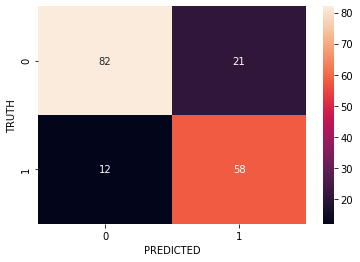

In [50]:
sns.heatmap(cm, annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

#### hyperparameter tuning

#### DecisionTreeClassifier

In [51]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)
dtc_model.score(x_test, y_test)

0.7976878612716763

In [52]:
cm_dtc = metrics.confusion_matrix(y_test, dtc_model.predict(x_test))
cm_dtc

array([[89, 14],
       [21, 49]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

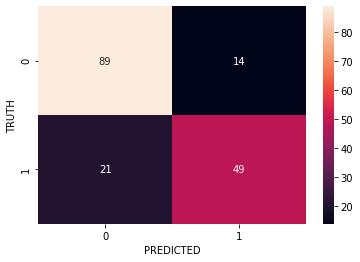

In [53]:
sns.heatmap(cm_dtc, annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

#### hyperparameter tuning

In [54]:
ada_param = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

DTC = DecisionTreeClassifier()
ABC_DTC = AdaBoostClassifier(DTC, random_state=7)
gs_ABC_DTC =GridSearchCV(ABC_DTC,param_grid=ada_param,cv=kfold, scoring='accuracy',n_jobs=4,verbose=1)
gs_ABC_DTC.fit(x_train, y_train)
ABC_DTC_best = gs_ABC_DTC.best_estimator_
print(ABC_DTC_best)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 644 tasks      | elapsed:   14.7s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(splitter='random'),
                   learning_rate=0.01, n_estimators=2, random_state=7)


[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   20.4s finished


In [55]:
ABC_DTC_best.score(x_test,y_test)

0.8265895953757225

In [56]:
cm_rfc = metrics.confusion_matrix(y_test, ABC_DTC_best.predict(x_test))
cm_rfc

array([[97,  6],
       [24, 46]], dtype=int64)

#### RandomForestClassifer

In [57]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)
rfc_model.score(x_test,y_test)

0.8554913294797688

In [58]:
cm_rfc = metrics.confusion_matrix(y_test, rfc_model.predict(x_test))
cm_rfc

array([[91, 12],
       [13, 57]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

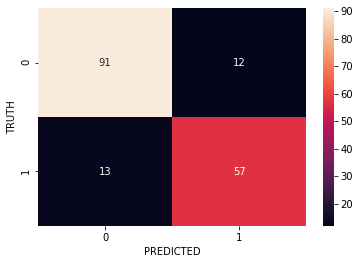

In [59]:
sns.heatmap(cm_rfc, annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

#### hyperparameter tuning

In [60]:
rf_param = {"max_depth": [None],
            "max_features": [1, 3, 10],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

gs_rfc_model=GridSearchCV(rfc_model,param_grid=rf_param,cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)
gs_rfc_model.fit(x_train, y_train)
rfc_best = gs_rfc_model.best_estimator_
print(gs_rfc_model.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   57.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.8min finished


0.8870355519914461


In [61]:
cm_rfc = metrics.confusion_matrix(y_test, rfc_best.predict(x_test))
cm_rfc

array([[91, 12],
       [17, 53]], dtype=int64)

In [66]:
with open('rfc_model.pickle', 'wb') as f:
    pickle.dump(gs_rfc_model, f)

In [67]:
with open('rfc_model.pickle','rb') as f:
    model = pickle.load(f)

In [ ]:
print(x_test.iloc[0])

In [ ]:
model.predict([x_test.iloc[0]])[0]

In [ ]:
model.predict([[1,36,1,2,120,1,0,0,0,1]])

In [ ]:
y_test.value_counts()

#### ExtraTreeClassifier

In [62]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train, y_train)
etc_model.score(x_test,y_test)

0.8323699421965318

In [63]:
cm_etc = metrics.confusion_matrix(y_test, etc_model.predict(x_test))
cm_etc

array([[90, 13],
       [16, 54]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

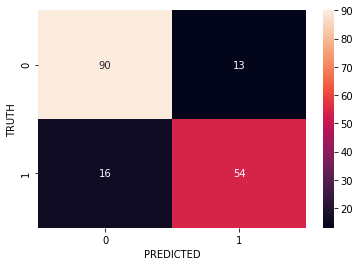

In [64]:
sns.heatmap(cm_etc, annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

#### hyperparameter tuning

In [65]:
ex_param = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

ETC = ExtraTreesClassifier()
gsETC = GridSearchCV(ETC, param_grid=ex_param, cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)
gsETC.fit(x_train, y_train)
ETC_best = gsETC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.3min finished


In [66]:
gsETC.best_score_

0.889347767976477

In [67]:
cm_etc = metrics.confusion_matrix(y_test, ETC_best.predict(x_test))
cm_etc

array([[92, 11],
       [18, 52]], dtype=int64)

#### GradientBoostingClassifier

In [68]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)
gbc_model.score(x_test, y_test)

0.8439306358381503

In [69]:
cm_gbc = metrics.confusion_matrix(y_test, gbc_model.predict(x_test))
cm_gbc

array([[90, 13],
       [14, 56]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

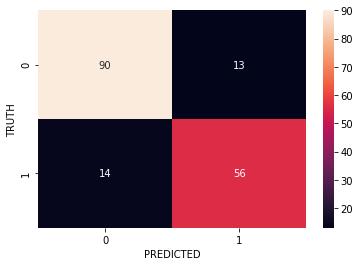

In [70]:
sns.heatmap(cm_gbc, annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

#### hyperparameter tuning

In [71]:
gb_param = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

GBC = GradientBoostingClassifier()
gsGBC = GridSearchCV(GBC,param_grid=gb_param,cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)
gsGBC.fit(x_train, y_train)
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.5min finished


0.8190323442929698

In [72]:
GBC_best = gsGBC.best_estimator_

In [73]:
cm_GBC = metrics.confusion_matrix(y_test, GBC_best.predict(x_test))
cm_GBC

array([[89, 14],
       [15, 55]], dtype=int64)

### Ensemble modeling

In [74]:
prediction_logr = pd.Series(logr_model.predict(test2), name='logistic')
prediction_dtc_ada = pd.Series(ABC_DTC_best.predict(test2), name='ada_dtc')
prediction_rfc = pd.Series(rfc_best.predict(test2), name='rfc')
prediction_etc = pd.Series(ETC_best.predict(test2), name='ETC')
prediction_gbc = pd.Series(GBC_best.predict(test2), name='GBC')

In [75]:
#concat all classifier result
ensemble_results = pd.concat([prediction_logr,prediction_dtc_ada,prediction_rfc,prediction_etc,prediction_gbc], axis=1)

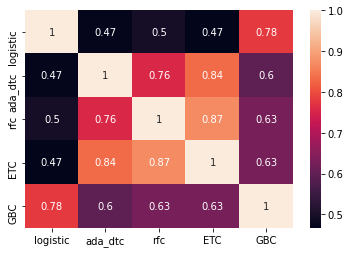

In [76]:
g = sns.heatmap(ensemble_results.corr(), annot=True)

In [77]:
voting_classifier = VotingClassifier(
    estimators = [
        ('logistic', logr_model),
        ('ada_dtc', ABC_DTC_best),
        ('rfc', rfc_best),
        ('ETC_best', ETC_best),
        ('GBC_best', GBC_best)
    ], voting='soft', n_jobs=4
)

In [78]:
v_c_model = voting_classifier.fit(x_train,y_train)

### test model

In [79]:
prediction = v_c_model.predict(test2)

In [80]:
submission = pd.DataFrame(
    {
        'PassengerId' : test.PassengerId,
        'Survived' : prediction
    }
)

In [81]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
